In [120]:
import pandas as pd
import pandas as pd
from tqdm import tqdm_notebook as tqdm

#Scikit-learn


#NLTK
import nltk
from nltk.corpus import stopwords

import plotly.express as px

nltk.download("stopwords")
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

from nltk.stem.snowball import SnowballStemmer 
import string
import re
from nltk.stem import *
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation


from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN


from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression

from catboost import CatBoostClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
data = pd.read_csv('./df_sep_label_.csv')

In [48]:
data.head(5)

,sentiment,Классификация по ОКПД2_x,Наименование закупки_x,Реестровый номер закупки,Закупки по,Дата размещения
0,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44-ФЗ,04.09.2023
1,Подходит,62.09.20.190: Услуги по технической поддержке ...,оказание услуг по обслуживанию и сопровождени...,№0304300010623000024,44-ФЗ,21.09.2023
2,Не подходит,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44-ФЗ,07.09.2023
3,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44-ФЗ,18.09.2023
4,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44-ФЗ,21.08.2023


In [49]:
data.shape

(3204, 6)

In [50]:
data.rename(columns={'Классификация по ОКПД2_x':'okpd_2'},inplace=True)
data.rename(columns={'Наименование закупки_x':'name'},inplace=True)
data.rename(columns={'Реестровый номер закупки':'number'},inplace=True)
data.rename(columns={'Закупки по':'fz'},inplace=True)
data.rename(columns={'Дата размещения':'date'},inplace=True)


In [51]:
data

,sentiment,okpd_2,name,number,fz,date
0,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44-ФЗ,04.09.2023
1,Подходит,62.09.20.190: Услуги по технической поддержке ...,оказание услуг по обслуживанию и сопровождени...,№0304300010623000024,44-ФЗ,21.09.2023
2,Не подходит,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44-ФЗ,07.09.2023
3,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44-ФЗ,18.09.2023
4,Не подходит,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44-ФЗ,21.08.2023
...,...,...,...,...,...,...
3199,Не подходит,62.02.30.000: Услуги по технической поддержке ...,"Оказание услуг по восстановлению, обновлению п...",№32312635470,223-ФЗ,01.08.2023
3200,Не подходит,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по обслуживанию программы 1С:Бу...,№32312635242,223-ФЗ,01.08.2023
3201,Не подходит,62.03.12.130: Услуги по сопровождению компьюте...,Услуги по адаптации и сопровождению экземпляро...,№32312634646,223-ФЗ,01.08.2023
3202,Не подходит,62.09.2: Услуги в области информационных техно...,Предоставление права использования программы д...,№32312634315,223-ФЗ,01.08.2023


In [52]:
data.isnull().sum()

sentiment    18
okpd_2        2
name          0
number        0
fz            0
date          0
dtype: int64

Мы видим присутствие пропущенных значений, необходимо их удалить.

In [53]:
data.dropna(subset=['sentiment'], inplace=True)
data.dropna(subset=['okpd_2'], inplace=True)

In [54]:
data.isnull().sum()

sentiment    0
okpd_2       0
name         0
number       0
fz           0
date         0
dtype: int64

In [55]:
#Дополнение списка стоп-слов
# Дополнить список

stop_words = stopwords.words('russian')
stop_words.append('енпф')
stop_words.append('«')
stop_words.append('»')

Функция предобработки данных.

In [56]:
def preprocessing(texts):
    new_text = []
    for i in tqdm(range(len(texts))):  # Итерируемся по индексам текстов в списке texts
        text = texts[i]  # Получаем текущий текст по индексу i
        stop_free = " ".join([i for i in text.lower().split() if i not in stop_words]) 
        # Преобразуем текст в нижний регистр, разделяем на слова и удаляем стоп-слова (слова, которые не несут смысловой нагрузки)
        punc_free = ''.join(ch for ch in stop_free if ch not in spec_chars) 
        # Удаляем пунктуацию (символы, не относящиеся к словам)
        lem_text = " ".join([lemma.parse(word)[0].normal_form for word in punc_free.split(' ')]) 
        # Применяем лемматизацию к каждому слову и объединяем обработанные слова обратно в текст
        new_text.append(lem_text) 
        # Добавляем обработанный текст в список new_text
    return new_text  # Возвращаем список new_text, содержащий все обработанные тексты

In [57]:
print(data['sentiment'].unique(), len(data['sentiment'].unique()))

['Не подходит' 'Подходит' 'Скорее нет' 'Скорее да' 'Затрудняюсь'] 5


## Выборка данных

In [58]:
topics = ['Не подходит', 'Подходит', 'Скорее нет', 'Скорее да', 'Затрудняюсь']

In [59]:
df_res = pd.DataFrame()
in_cat_count = data.shape[0]

for topic in tqdm(topics):
    df_topic = data[data['sentiment'] == topic][:in_cat_count]
    df_res = df_res.append(df_topic, ignore_index=True)

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\1222733655.py:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/5 [00:00<?, ?it/s]

In [60]:
df_res.shape

(3184, 6)

## Предобработка

In [61]:
def remove_punctuation(text):
    text = text.replace('«', '').replace('»', '') # добавил обработку ковычек
    text = text.replace('№', '')  # добавил обработку символа "№"
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])


def remove_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

mystem = Mystem() 

russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...'])

def lemmatize_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords and token != " "]
    text = " ".join(tokens)
    return text

In [62]:
df_res['fz'] = df_res['fz'].replace('44-ФЗ', 44)
df_res['fz'] = df_res['fz'].replace('223-ФЗ', 223)

In [63]:
preproccessing = lambda text: (remove_multiple_spaces(remove_numbers(remove_punctuation(text))))
df_res['preproccessed_name'] = list(map(preproccessing, df_res['name']))
df_res['preproccessed_okpd_2'] = list(map(preproccessing, df_res['okpd_2']))

In [64]:
prep_preproccessed_name = [remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower()))) for text in tqdm(df_res['preproccessed_name'])]
prep_preproccessed_okpd_2 = [remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower()))) for text in tqdm(df_res['preproccessed_okpd_2'])]

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\2915617272.py:1: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\2915617272.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

In [65]:
len(prep_preproccessed_name)
prep_preproccessed_name[3180]

'оказание услуг по внедрению мобильного приложения для управления личным кабинетом абонента'

In [66]:
len(prep_preproccessed_okpd_2)
prep_preproccessed_okpd_2[3180]

' услуги по установке программного обеспечения'

In [67]:
df_res['preproccessed_name'] = prep_preproccessed_name
df_res['preproccessed_okpd_2'] = prep_preproccessed_okpd_2

In [68]:
fig = px.histogram(df_res, x='sentiment')
fig.show()

In [69]:
df_res.loc[df_res['sentiment'].isin(['Не подходит', 'Скорее нет', 'Затрудняюсь']), 'sentiment'] = 0
df_res.loc[df_res['sentiment'].isin(['Подходит', 'Скорее да']), 'sentiment'] = 1

In [70]:
fig = px.histogram(df_res, x='sentiment')
fig.show()

# не подходит 

- Предоставление неисключительного права использования антивирусного программного обеспечения Kaspersky Endpoint Security для бизнеса - Стандартный Russian Edition
- Оказание услуги по предоставлению сертификата на техническую поддержку программного продукта «ПАРУС-Бюджет 8»

# Подходит 

- Оказание услуг по созданию (развитию) и внедрению элементов интеллектуальной транспортной системы Новосибирской агломерации, предусматривающей автоматиза-цию процессов управления дорожным движением на территории городского округа Новосибирск, с приобретением и установкой оборудования, а также доступа к пред-установленному программному обеспечению для функционирования информационных систем (муниципальный уровень ИТС - Новосибирский городской округ)

- Оказание услуг по разработке программного обеспечения "Личный кабинет недропользователя" для Министерства природопользования и экологии Владимирской области.

In [71]:
df_res.head(8)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2
0,0,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44,04.09.2023,предоставление неисключительного права исполь...,оригиналы программного обеспечения прочие
1,0,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44,07.09.2023,предоставление услуг по сопровождению програм...,услуги консультативные в области компьютерных...
2,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44,18.09.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие
3,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44,21.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие
4,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0316400001123000094,44,17.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие
5,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0853300008723000019,44,07.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие
6,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0853300008723000015,44,04.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие
7,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0853300008723000014,44,04.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие


### Стемминг

Стемминг — это процесс обработки текста, направленный на нахождение основы слова (стема) путем удаления аффиксов (окончаний) и суффиксов. Цель стемминга состоит в том, чтобы привести различные формы одного слова к единой основе. Например, слова "бегу", "бежим", "бежал" будут приведены к общей основе "беж".

Стемминг позволяет уменьшить размер словаря, улучшить процесс поиска и анализа текста, а также улучшить качество моделей обработки естественного языка. Однако стемминг не всегда точен, так как он может привести к потере части информации и к неоднозначности в некоторых случаях.

In [72]:
stemmer = SnowballStemmer("russian") 

In [73]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['…', '«', '»', '...', 'т.д.', 'т', 'д'])

данный код разбивает текст из столбца 'preproccessed_name' первой строки DataFrame на отдельные слова (токены) с помощью токенизации слов.

In [74]:
text = df_res['preproccessed_name'][0]
word_tokenize(text) 

['предоставление',
 'неисключительного',
 'права',
 'использования',
 'антивирусного',
 'программного',
 'обеспечения',
 'kaspersky',
 'endpoint',
 'security',
 'для',
 'бизнеса',
 'стандартный',
 'russian',
 'edition']

In [75]:
stemmed_preproccessed_name = []
for text in tqdm(df_res['preproccessed_name']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_preproccessed_name.append(text)

df_res['preproccessed_name_stem'] = stemmed_preproccessed_name


stemmed_preproccessed_okpd_2 = []
for text in tqdm(df_res['preproccessed_okpd_2']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_preproccessed_okpd_2.append(text)

df_res['preproccessed_okpd_2_stem'] = stemmed_preproccessed_okpd_2

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\3732494110.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\3732494110.py:12: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

In [76]:
df_res.sample(8)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2,preproccessed_name_stem,preproccessed_okpd_2_stem
2476,0,58.29.5: Услуги по предоставлению лицензий на ...,Оказание услуг по передаче прав на использован...,№0817200000323013507,44,22.08.2023,оказание услуг по передаче прав на использован...,услуги по предоставлению лицензий на право ис...,оказан услуг передач прав использован средств ...,услуг предоставлен лиценз прав использова комп...
975,0,62.09.20.190: Услуги по технической поддержке ...,Оказание услуг по модернизации системы электро...,№0139200000123014362,44,28.09.2023,оказание услуг по модернизации системы электро...,услуги по технической поддержке в области инф...,оказан услуг модернизац систем электрон докуме...,услуг техническ поддержк област информацион те...
37,0,62.02.30.000: Услуги по технической поддержке ...,2024/9-10 Оказание услуг по сопровождению ИАС ...,№32312696049,223,22.08.2023,оказание услуг по сопровождению иас контрагент,услуги по технической поддержке информационны...,оказан услуг сопровожден иас контрагент,услуг техническ поддержк информацион технолог
2230,0,62.01.29.000: Оригиналы программного обеспечен...,Оказание услуг по предоставлению неисключитель...,№0329200062223007046,44,29.08.2023,оказание услуг по предоставлению неисключитель...,оригиналы программного обеспечения прочие усл...,оказан услуг предоставлен неисключительн прав ...,оригинал программн обеспечен проч услуг предос...
2352,0,62.01.29.000: Оригиналы программного обеспечен...,Поставка сертификата на техническую поддержку ...,№0318300183923000187,44,25.08.2023,поставка сертификата на техническую поддержку ...,оригиналы программного обеспечения прочие,поставк сертификат техническ поддержк программ...,оригинал программн обеспечен проч
3107,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг доработке программного обеспече...,№0118300013323001181,44,18.08.2023,оказание услуг доработке программного обеспече...,услуги по технической поддержке информационны...,оказан услуг доработк программн обеспечен анге...,услуг техническ поддержк информацион технолог
1007,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по предоставлению сертификатов ...,№0157300025223000323,44,29.09.2023,оказание услуг по предоставлению сертификатов ...,услуги по технической поддержке информационны...,оказан услуг предоставлен сертификат активац с...,услуг техническ поддержк информацион технолог
891,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по поставке сертификата на техн...,№0318300137623000386,44,28.09.2023,оказание услуг по поставке сертификата на техн...,услуги по технической поддержке информационны...,оказан услуг поставк сертификат техническ подд...,услуг техническ поддержк информацион технолог


In [77]:
def remove_stop_words(text):
    tokens = word_tokenize(text) 
    tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
    return " ".join(tokens)

In [78]:
# sw_texts_list = []
# for text in tqdm(df_res['text_prep']):
#     tokens = word_tokenize(text)    
#     tokens = [token for token in tokens if token not in russian_stopwords and token != ' ']
#     text = " ".join(tokens)
#     sw_texts_list.append(text)

# df_res['text_sw'] = sw_texts_list

In [79]:
df_res['preproccessed_name_stem'][355]

'оказан год услуг адаптац сопровожден экземпляр справочн правов сист консультант плюс'

In [80]:
df_res.to_csv('df_1t_stemmed.csv')

## Лемматизация

Лемматизация - это процесс приведения слова к его нормальной форме, так называемой лемме. Лемма - это базовая форма слова, которая является словарной формой этого слова. Например, леммой для слова "бежал", "бежит", "бежим" будет слово "бежать".

Лемматизация применяется для стандартизации текста и уменьшения размера словаря, что улучшает качество анализа текста и обработки естественного языка. Это помогает избежать проблем с различными формами слова и повысить точность анализа.

Недостатки лемматизации включают в себя:
1. Высокую вычислительную сложность: лемматизация может потребовать больше времени и ресурсов для обработки текста по сравнению со стеммингом.
2. Возможные потери информации: в некоторых случаях лемматизация может привести к потере некоторых деталей или нюансов, так как слова могут быть приведены к общей форме.
3. Неоднозначность: некоторые слова могут иметь несколько лемм, что может вызвать неоднозначность в некоторых случаях.

Несмотря на недостатки, лемматизация обычно предпочтительнее стемминга в задачах обработки естественного языка, так как она обеспечивает более точное приведение слов к их базовым формам.

In [81]:
# 40 минут выполения, далее сохраним датасет с лемматизацией

lemm_texts_list = []
for text in tqdm(df_res['preproccessed_name']):
    
    try:
        text_lem = mystem.lemmatize(text)
        tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
        text = " ".join(tokens)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df_res['preproccessed_name_lemm'] = lemm_texts_list

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\932139226.py:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

In [82]:
lemm_texts_list = []
for text in tqdm(df_res['preproccessed_okpd_2']):
    
    try:
        text_lem = mystem.lemmatize(text)
        tokens = [token for token in text_lem if token != ' ' and token not in russian_stopwords]
        text = " ".join(tokens)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df_res['preproccessed_okpd_2_lemm'] = lemm_texts_list

C:\Users\Mi\AppData\Local\Temp\ipykernel_21996\1452289500.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/3184 [00:00<?, ?it/s]

In [83]:
def lemmatize_text(text):
    text_lem = mystem.lemmatize(text)
    tokens = [token for token in text_lem if token != ' ']
    return " ".join(tokens)

In [84]:
df_res.to_csv('df_pp_stem_lemm.csv')

----------------------

# БЛОК ДЛЯ моделей

----------------------------

 - колонки датасета
 
sentiment	
okpd_2	
name	
number	
fz	
date	
preproccessed_name	
preproccessed_okpd_2	
preproccessed_name_stem	
preproccessed_okpd_2_stem	
preproccessed_name_lemm	
preproccessed_okpd_2_lemm

In [85]:
df_res = pd.read_csv('df_pp_stem_lemm.csv', encoding = 'utf-8')

In [86]:
df_res = df_res.drop(['Unnamed: 0'], axis=1)

In [87]:
df_res.head(8)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2,preproccessed_name_stem,preproccessed_okpd_2_stem,preproccessed_name_lemm,preproccessed_okpd_2_lemm
0,0,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44,04.09.2023,предоставление неисключительного права исполь...,оригиналы программного обеспечения прочие,предоставлен неисключительн прав использован а...,оригинал программн обеспечен проч,предоставление неисключительный право использо...,оригинал программный обеспечение прочий \n
1,0,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44,07.09.2023,предоставление услуг по сопровождению програм...,услуги консультативные в области компьютерных...,предоставлен услуг сопровожден программн компл...,услуг консультативн област компьютерн технолог...,предоставление услуга сопровождение программны...,услуга консультативный область компьютерный те...
2,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44,18.09.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
3,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44,21.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
4,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0316400001123000094,44,17.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
5,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0853300008723000019,44,07.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
6,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0853300008723000015,44,04.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
7,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0853300008723000014,44,04.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n


In [88]:
fig = px.histogram(df_res, x='sentiment')
fig.show()

Борьба с дисбалансом классов

In [89]:
df_res['sentiment'] = df_res['sentiment'].astype('int')

In [90]:
X = df_res[['name']]
X_prep = df_res[['preproccessed_name']]
X_prep_stem = df_res[['preproccessed_name_stem']]
X_prep_lemm = df_res[['preproccessed_name_lemm']]

y = df_res['sentiment']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42, stratify=y)

X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(X_prep, y, test_size=0.15, random_state = 42, stratify=y)

X_train_prep_stem, X_test_prep_stem, y_train_prep_stem, y_test_prep_stem = train_test_split(X_prep_stem, y, test_size=0.15, random_state = 42, stratify=y)

X_train_prep_lemm, X_test_prep_lemm, y_train_prep_lemm, y_test_prep_lemm = train_test_split(X_prep_lemm, y, test_size=0.15, random_state = 42, stratify=y)

## TfidfVectorizer

In [92]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_prep = TfidfVectorizer()
tfidf_vectorizer_prep_stem = TfidfVectorizer()
tfidf_vectorizer_prep_lemm = TfidfVectorizer()

# Векторизация данных X
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train.name)
X_test_vectorized = tfidf_vectorizer.transform(X_test.name)

# Векторизация данных X_train_prep
X_train_prep_vectorized = tfidf_vectorizer_prep.fit_transform(X_train_prep.preproccessed_name)
X_test_prep_vectorized = tfidf_vectorizer_prep.transform(X_test_prep.preproccessed_name)

# Векторизация данных X_train_prep_stem
X_train_prep_stem_vectorized = tfidf_vectorizer_prep_stem.fit_transform(X_train_prep_stem.preproccessed_name_stem)
X_test_prep_stem_vectorized = tfidf_vectorizer_prep_stem.transform(X_test_prep_stem.preproccessed_name_stem)

# Векторизация данных X_train_prep_lemm
X_train_prep_lemm_vectorized = tfidf_vectorizer_prep_lemm.fit_transform(X_train_prep_lemm.preproccessed_name_lemm)
X_test_prep_lemm_vectorized = tfidf_vectorizer_prep_lemm.transform(X_test_prep_lemm.preproccessed_name_lemm)

In [93]:
print(X_train_prep_vectorized.shape)
print(y_train_prep.shape)

(2706, 4438)
(2706,)


# Создание пайплайна с добавлением SMOTE и ADASYN

Imbalanced-learn — используется для работы с несбалансированными наборами данных.

можно использовать различные методы для работы с несбалансированными наборами данных, такие как SMOTE и ADASYN.

Генерация синтетических данных (SMOTE, ADASYN)\
SMOTE (Synthetic Minority Over-sampling Technique)
работает путем генерации новых примеров класса-меньшинства на основе близлежащих соседей. Этот метод помогает сделать распределение классов более равномерным, сохраняя структуру данных.

ADASYN (Adaptive Synthetic Sampling)
ADASYN работает аналогично SMOTE, но с добавлением адаптивности. Он уделяет больше внимания классам, которые более затруднительны для классификации, генерируя больше синтетических примеров для таких классов.

In [94]:
class MyOversampling:
    def __init__(self):
        self.oversample_smote = SMOTE()
        self.oversample_adasyn = ADASYN()

    def oversample_data(self, X_train, y_train):
        X_smote, y_smote = self.oversample_smote.fit_resample(X_train, y_train)
        X_adasyn, y_adasyn = self.oversample_adasyn.fit_resample(X_train, y_train)
        return X_smote, y_smote, X_adasyn, y_adasyn

## oversampling

In [95]:
oversampling = MyOversampling()

X_smote, y_smote, X_adasyn, y_adasyn = oversampling.oversample_data(X_train_vectorized, y_train)

X_smote_prep, y_smote_prep, X_adasyn_prep, y_adasyn_prep = oversampling.oversample_data(X_train_prep_vectorized, y_train_prep)

X_smote_stem, y_smote_stem, X_adasyn_stem, y_adasyn_stem = oversampling.oversample_data(X_train_prep_stem_vectorized, y_train_prep_stem)

X_smote_lemm, y_smote_lemm, X_adasyn_lemm, y_adasyn_lemm = oversampling.oversample_data(X_train_prep_lemm_vectorized, y_train_prep_lemm)

---------------------

## Naive Bayes Classifier

In [96]:
nb_smote = MultinomialNB()
nb_smote.fit(X_smote, y_smote)
nb_adasyn = MultinomialNB()
nb_adasyn.fit(X_adasyn, y_adasyn)

nb_smote_prep = MultinomialNB()
nb_smote_prep.fit(X_smote_prep, y_smote_prep)
nb_adasyn_prep = MultinomialNB()
nb_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

nb_smote_stem = MultinomialNB()
nb_smote_stem.fit(X_smote_stem, y_smote_stem)
nb_adasyn_stem = MultinomialNB()
nb_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

nb_smote_lemm = MultinomialNB()
nb_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
nb_adasyn_lemm = MultinomialNB()
nb_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

MultinomialNB()

In [97]:
nb_smote_predict = pd.Series(nb_smote.predict(X_test_vectorized))
nb_adasyn_predict = pd.Series(nb_adasyn.predict(X_test_vectorized))

nb_smote_prep_predict = pd.Series(nb_smote_prep.predict(X_test_prep_vectorized))
nb_adasyn_prep_predict = pd.Series(nb_adasyn_prep.predict(X_test_prep_vectorized))

nb_smote_stem_predict = pd.Series(nb_smote_stem.predict(X_test_prep_stem_vectorized))
nb_adasyn_stem_predict = pd.Series(nb_adasyn_stem.predict(X_test_prep_stem_vectorized))

nb_smote_lemm_predict = pd.Series(nb_smote_lemm.predict(X_test_prep_lemm_vectorized))
nb_adasyn_lemm_predict = pd.Series(nb_adasyn_lemm.predict(X_test_prep_lemm_vectorized))

my_tags = y_test_prep.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, nb_smote_predict), '--- nb_smote_predict')
print(roc_auc_score(y_test, nb_adasyn_predict),'--- nb_adasyn_predict')
print(classification_report(y_test, nb_smote_predict, target_names=my_tags))
print(classification_report(y_test, nb_adasyn_predict, target_names=my_tags))
print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, nb_smote_prep_predict), '--- nb_smote_prep_predict')
print(roc_auc_score(y_test_prep, nb_adasyn_prep_predict),'--- nb_adasyn_prep_predict')
print(classification_report(y_test_prep, nb_smote_prep_predict, target_names=my_tags))
print(classification_report(y_test_prep, nb_adasyn_prep_predict, target_names=my_tags))
print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, nb_smote_stem_predict), '--- nb_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, nb_adasyn_stem_predict),'--- nb_adasyn_stem_predict')
print(classification_report(y_test_prep_stem, nb_smote_stem_predict, target_names=my_tags))
print(classification_report(y_test_prep_stem, nb_adasyn_stem_predict, target_names=my_tags))
print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, nb_smote_lemm_predict), '--- nb_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, nb_adasyn_lemm_predict),'--- nb_adasyn_lemm_predict')
print(classification_report(y_test_prep_lemm, nb_smote_lemm_predict, target_names=my_tags))
print(classification_report(y_test_prep_lemm, nb_adasyn_lemm_predict, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.7816113624937154 --- nb_smote_predict
0.831510809451986 --- nb_adasyn_predict
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       442
           1       0.30      0.69      0.42        36

    accuracy                           0.86       478
   macro avg       0.64      0.78      0.67       478
weighted avg       0.92      0.86      0.88       478

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       442
           1       0.32      0.81      0.45        36

    accuracy                           0.85       478
   macro avg       0.65      0.83      0.68       478
weighted avg       0.93      0.85      0.88       478

---------------y_test_prep--------------- 
 ____roc_auc_score____
0.7748240321769734 --- nb_smote_prep_predict
0.813097033685269 --- nb_adasyn_prep_predict
              precision    recall  f1-score   sup

# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом SMOTE

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.8709150326797385 --- nb_smote_stem_predict\
0.8513700351935646 --- nb_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.99      0.85      0.92       442
           1       0.33      0.89      0.48        36

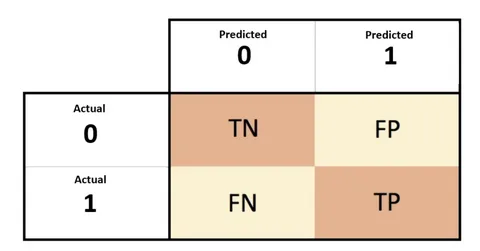

In [98]:
print((confusion_matrix(y_test_prep_stem, nb_smote_stem_predict)))

[[378  64]
 [  7  29]]


------------------------------------------

# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом (и SMOTE и ADASYN)

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.8447712418300652 --- SGD_smote_stem_predict\
0.8447712418300652 --- SGD_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.98      0.91      0.94       442
           1       0.42      0.78      0.54        36

In [141]:
print((confusion_matrix(y_test_prep_stem, sgd_smote_stem_predict)))

[[408  34]
 [ 10  26]]


-------------------------------------------------

### Logistic Regression

In [102]:
logreg_smote = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote.fit(X_smote, y_smote)
logreg_adasyn = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn.fit(X_adasyn, y_adasyn)

logreg_smote_prep = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote_prep.fit(X_smote_prep, y_smote_prep)
logreg_adasyn_prep = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

logreg_smote_stem = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote_stem.fit(X_smote_stem, y_smote_stem)
logreg_adasyn_stem = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

logreg_smote_lemm = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
logreg_adasyn_lemm = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression(C=100000.0, class_weight='balanced', n_jobs=1)

In [104]:
logreg_smote.predict_proba(X_test_vectorized)[:,1]

array([8.38737690e-08, 5.54427362e-05, 9.90963401e-01, 9.99999996e-01,
       3.02118189e-08, 2.27302562e-13, 3.90219186e-11, 1.53307668e-02,
       4.48823621e-10, 1.01055871e-12, 4.07529094e-10, 3.54124653e-11,
       2.83800630e-10, 2.74740785e-08, 9.99978245e-01, 2.31400774e-11,
       1.50528489e-10, 3.83754911e-01, 6.92057812e-08, 1.49344330e-11,
       3.92034409e-02, 3.22989031e-07, 8.33763240e-01, 3.02799794e-08,
       1.86778121e-18, 1.01055871e-12, 4.70251469e-08, 1.01055871e-12,
       6.53383884e-08, 2.07401298e-11, 5.40086162e-16, 2.99284024e-10,
       4.97914230e-05, 1.57524407e-04, 4.50291741e-09, 1.24031910e-12,
       1.91292849e-10, 9.74370949e-01, 5.14701903e-10, 4.39538521e-07,
       4.07529094e-10, 3.87209054e-02, 2.83248589e-11, 6.08628546e-10,
       1.70422701e-08, 4.96594315e-05, 1.01055871e-12, 6.48500588e-14,
       3.20000419e-12, 5.87714534e-10, 5.10431302e-11, 2.45970213e-10,
       1.00611301e-05, 3.17886292e-08, 2.70208194e-11, 1.12729615e-06,
      

In [138]:
logreg_smote_predict = pd.Series(logreg_smote.predict(X_test_vectorized))
logreg_adasyn_predict = pd.Series(logreg_adasyn.predict(X_test_vectorized))

logreg_smote_prep_predict = pd.Series(logreg_smote_prep.predict(X_test_prep_vectorized))
logreg_adasyn_prep_predict = pd.Series(logreg_adasyn_prep.predict(X_test_prep_vectorized))

logreg_smote_stem_predict = pd.Series(logreg_smote_stem.predict(X_test_prep_stem_vectorized))
logreg_adasyn_stem_predict = pd.Series(logreg_adasyn_stem.predict(X_test_prep_stem_vectorized))

logreg_smote_lemm_predict = pd.Series(logreg_smote_lemm.predict(X_test_prep_lemm_vectorized))
logreg_adasyn_lemm_predict = pd.Series(logreg_adasyn_lemm.predict(X_test_prep_lemm_vectorized))

my_tags = y_test_prep.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, (logreg_smote.predict_proba(X_test_vectorized)[:,1])), '--- logreg_smote_predict')
print(roc_auc_score(y_test, (logreg_adasyn.predict_proba(X_test_vectorized)[:,1])),'--- logreg_adasyn_predict')
print('--------------logreg_smote_predict----------------')
print((confusion_matrix(y_test, logreg_smote_predict)))
print('--------------logreg_adasyn_predict----------------')
print((confusion_matrix(y_test, logreg_adasyn_predict)))
print(classification_report(y_test, logreg_smote_predict, target_names=my_tags))
print(classification_report(y_test, logreg_adasyn_predict, target_names=my_tags))


print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, (logreg_smote_prep.predict_proba(X_test_prep_vectorized)[:,1])), '--- logreg_smote_prep_predict')
print(roc_auc_score(y_test_prep, (logreg_adasyn_prep.predict_proba(X_test_prep_vectorized)[:,1])),'--- logreg_adasyn_prep_predict')
print('--------------logreg_smote_prep_predict----------------')
print((confusion_matrix(y_test, logreg_smote_prep_predict)))
print('--------------logreg_adasyn_prep_predict----------------')
print((confusion_matrix(y_test, logreg_adasyn_prep_predict)))
print(classification_report(y_test_prep, logreg_smote_prep_predict, target_names=my_tags))
print(classification_report(y_test_prep, logreg_adasyn_prep_predict, target_names=my_tags))

print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, (logreg_smote_stem.predict_proba(X_test_prep_stem_vectorized)[:,1])), '--- logreg_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, (logreg_adasyn_stem.predict_proba(X_test_prep_stem_vectorized)[:,1])),'--- logreg_adasyn_stem_predict')
print('--------------logreg_smote_stem_predict----------------')
print((confusion_matrix(y_test, logreg_smote_stem_predict)))
print('--------------logreg_adasyn_stem_predict----------------')
print((confusion_matrix(y_test, logreg_adasyn_stem_predict)))
print(classification_report(y_test_prep_stem, logreg_smote_stem_predict, target_names=my_tags))
print(classification_report(y_test_prep_stem, logreg_adasyn_stem_predict, target_names=my_tags))

print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, (logreg_smote_lemm.predict_proba(X_test_prep_lemm_vectorized)[:,1])), '--- logreg_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, (logreg_adasyn_lemm.predict_proba(X_test_prep_lemm_vectorized)[:,1])),'--- logreg_adasyn_lemm_predict')
print('--------------logreg_smote_lemm_predict----------------')
print((confusion_matrix(y_test, logreg_smote_lemm_predict)))
print('--------------logreg_adasyn_lemm_predict----------------')
print((confusion_matrix(y_test, logreg_adasyn_lemm_predict)))
print(classification_report(y_test_prep_lemm, logreg_smote_lemm_predict, target_names=my_tags))
print(classification_report(y_test_prep_lemm, logreg_adasyn_lemm_predict, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.9292986425339367 --- logreg_smote_predict
0.9307440925087984 --- logreg_adasyn_predict
--------------logreg_smote_predict----------------
[[423  19]
 [ 14  22]]
--------------logreg_adasyn_predict----------------
[[424  18]
 [ 14  22]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       442
           1       0.54      0.61      0.57        36

    accuracy                           0.93       478
   macro avg       0.75      0.78      0.77       478
weighted avg       0.94      0.93      0.93       478

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       442
           1       0.55      0.61      0.58        36

    accuracy                           0.93       478
   macro avg       0.76      0.79      0.77       478
weighted avg       0.94      0.93      0.93       478

---------------y_test_prep--------------- 
 ___

In [131]:
predict_smote = pd.Series(logreg_smote_prep.predict_proba(X_test_prep_vectorized)[:,1])
predict_adasyn = pd.Series(logreg_adasyn_prep.predict_proba(X_test_prep_vectorized)[:,1])

print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____', '\n')
print(roc_auc_score(y_test_prep_stem, predict_smote), '--- logreg_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, predict_adasyn),'--- logreg_adasyn_stem_predict', '\n')
print('--------------confusion_matrix----------------', '\n')
print((confusion_matrix(y_test_prep_stem, logreg_smote_stem_predict)))

---------------y_test_prep_stem--------------- 
 ____roc_auc_score____ 

0.92087732528909 --- logreg_smote_stem_predict
0.9210658622423328 --- logreg_adasyn_stem_predict 

--------------confusion_matrix---------------- 

[[424  18]
 [ 11  25]]


# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом SMOTE

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.814102564102564 --- logreg_smote_stem_predict\
0.812971342383107 --- logreg_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.97      0.96      0.97       442
           1       0.57      0.67      0.62        36

# LOGREG на обычных векторизованных данных без SMOTE и ADASYN

In [128]:
logreg = LogisticRegression(n_jobs=1, C=1e5, class_weight='balanced')
logreg.fit(X_train_vectorized, y_train)
logreg_predict = pd.Series(logreg.predict(X_test_vectorized))

my_tags = y_test.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','______logreg____')
print(roc_auc_score(y_test, (logreg.predict_proba(X_test_vectorized)[:,1])), '--- logreg_smote_predict')
print(classification_report(y_test, logreg_predict, target_names=my_tags))
print('--------------confusion_matrix----------------', '\n')
print((confusion_matrix(y_test, logreg_predict)))

---------------y_test--------------- 
 ______logreg____
0.9288587229763701 --- logreg_smote_predict
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       442
           1       0.55      0.61      0.58        36

    accuracy                           0.93       478
   macro avg       0.76      0.79      0.77       478
weighted avg       0.94      0.93      0.93       478

--------------confusion_matrix---------------- 

[[424  18]
 [ 14  22]]


<font color='#87CEEB'><i>  Модель с самым большим RECALL для 1 класса (нужного нам) --  Naive Bayes Classifier </i></font>

-------

## Бустинги

______

## CatBoostClassifier

In [133]:
cbc_smote = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_smote.fit(X_smote, y_smote)
cbc_adasyn = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_adasyn.fit(X_adasyn, y_adasyn)

cbc_smote_prep = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_smote_prep.fit(X_smote_prep, y_smote_prep)
cbc_adasyn_prep = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

cbc_smote_stem = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_smote_stem.fit(X_smote_stem, y_smote_stem)
cbc_adasyn_stem = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

cbc_smote_lemm = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
cbc_adasyn_lemm = CatBoostClassifier(depth = 6, iterations = 1850, learning_rate = 0.09 )
cbc_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

0:	learn: 0.5946069	total: 41.7ms	remaining: 1m 17s
1:	learn: 0.5183468	total: 76.3ms	remaining: 1m 10s
2:	learn: 0.4634533	total: 108ms	remaining: 1m 6s
3:	learn: 0.4121229	total: 140ms	remaining: 1m 4s
4:	learn: 0.3750243	total: 172ms	remaining: 1m 3s
5:	learn: 0.3458642	total: 203ms	remaining: 1m 2s
6:	learn: 0.3218069	total: 236ms	remaining: 1m 2s


7:	learn: 0.3038942	total: 269ms	remaining: 1m 1s
8:	learn: 0.2815434	total: 371ms	remaining: 1m 15s
9:	learn: 0.2683670	total: 422ms	remaining: 1m 17s
10:	learn: 0.2552087	total: 454ms	remaining: 1m 15s
11:	learn: 0.2425705	total: 485ms	remaining: 1m 14s
12:	learn: 0.2302267	total: 520ms	remaining: 1m 13s
13:	learn: 0.2215601	total: 552ms	remaining: 1m 12s
14:	learn: 0.2137887	total: 581ms	remaining: 1m 11s
15:	learn: 0.2062427	total: 610ms	remaining: 1m 9s
16:	learn: 0.1968348	total: 641ms	remaining: 1m 9s
17:	learn: 0.1920384	total: 670ms	remaining: 1m 8s
18:	learn: 0.1866041	total: 698ms	remaining: 1m 7s
19:	learn: 0.1797865	total: 727ms	remaining: 1m 6s
20:	learn: 0.1741094	total: 757ms	remaining: 1m 5s
21:	learn: 0.1700206	total: 786ms	remaining: 1m 5s
22:	learn: 0.1658125	total: 814ms	remaining: 1m 4s
23:	learn: 0.1623076	total: 844ms	remaining: 1m 4s
24:	learn: 0.1594051	total: 872ms	remaining: 1m 3s
25:	learn: 0.1560898	total: 901ms	remaining: 1m 3s
26:	learn: 0.1530302	total:

In [137]:
cbc_smote_predict = pd.Series(cbc_smote.predict(X_test_vectorized))
cbc_adasyn_predict = pd.Series(cbc_adasyn.predict(X_test_vectorized))

cbc_smote_prep_predict = pd.Series(cbc_smote_prep.predict(X_test_prep_vectorized))
cbc_adasyn_prep_predict = pd.Series(cbc_adasyn_prep.predict(X_test_prep_vectorized))

cbc_smote_stem_predict = pd.Series(cbc_smote_stem.predict(X_test_prep_stem_vectorized))
cbc_adasyn_stem_predict = pd.Series(cbc_adasyn_stem.predict(X_test_prep_stem_vectorized))

cbc_smote_lemm_predict = pd.Series(cbc_smote_lemm.predict(X_test_prep_lemm_vectorized))
cbc_adasyn_lemm_predict = pd.Series(cbc_adasyn_lemm.predict(X_test_prep_lemm_vectorized))


threshold = 0.5
my_tags = y_test.unique().astype(str).tolist()

cbc_smote_predict_binary = (cbc_smote_predict > threshold).astype(int)
cbc_adasyn_predict_binary = (cbc_adasyn_predict > threshold).astype(int)

cbc_smote_prep_predict_binary = (cbc_smote_prep_predict > threshold).astype(int)
cbc_adasyn_prep_predict_binary = (cbc_adasyn_prep_predict > threshold).astype(int)

cbc_smote_stem_predict_binary = (cbc_smote_stem_predict > threshold).astype(int)
cbc_adasyn_stem_predict_binary = (cbc_adasyn_stem_predict > threshold).astype(int)

cbc_smote_lemm_predict_binary = (cbc_smote_lemm_predict > threshold).astype(int)
cbc_adasyn_lemm_predict_binary = (cbc_adasyn_lemm_predict > threshold).astype(int)


print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, (cbc_smote.predict_proba(X_test_vectorized)[:,1])), '--- cbс_smote_predict')
print(roc_auc_score(y_test, (cbc_adasyn.predict_proba(X_test_vectorized)[:,1])),'--- cbс_adasyn_predict')
print('--------------cbc_smote_predict_binary----------------')
print((confusion_matrix(y_test, cbc_smote_predict_binary)))
print('--------------cbc_adasyn_predict_binary----------------')
print((confusion_matrix(y_test, cbc_adasyn_predict_binary)))
print(classification_report(y_test, cbc_smote_predict_binary, target_names=my_tags))
print(classification_report(y_test, cbc_adasyn_predict_binary, target_names=my_tags))


print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, (cbc_smote_prep.predict_proba(X_test_vectorized)[:,1])), '--- cbс_smote_prep_predict')
print(roc_auc_score(y_test_prep, (cbc_adasyn_prep.predict_proba(X_test_vectorized)[:,1])),'--- cbс_adasyn_prep_predict')
print('--------------cbc_smote_prep_predict_binary----------------')
print((confusion_matrix(y_test, cbc_smote_prep_predict_binary)))
print('--------------cbc_adasyn_prep_predict_binary----------------')
print((confusion_matrix(y_test, cbc_adasyn_prep_predict_binary)))
print(classification_report(y_test_prep, cbc_smote_prep_predict_binary, target_names=my_tags))
print(classification_report(y_test_prep, cbc_adasyn_prep_predict_binary, target_names=my_tags))


print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, (cbc_smote_stem.predict_proba(X_test_prep_stem_vectorized)[:,1])), '--- cbс_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, (cbc_adasyn_stem.predict_proba(X_test_prep_stem_vectorized)[:,1])),'--- cbс_adasyn_stem_predict')
print('--------------cbc_smote_stem_predict_binary----------------')
print((confusion_matrix(y_test, cbc_smote_stem_predict_binary)))
print('--------------cbc_adasyn_stem_predict_binary----------------')
print((confusion_matrix(y_test, cbc_adasyn_stem_predict_binary)))
print(classification_report(y_test_prep_stem, cbc_smote_stem_predict_binary, target_names=my_tags))
print(classification_report(y_test_prep_stem, cbc_adasyn_stem_predict_binary, target_names=my_tags))


print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, (cbc_smote_lemm.predict_proba(X_test_prep_lemm_vectorized)[:,1])), '--- cbс_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, (cbc_adasyn_lemm.predict_proba(X_test_prep_lemm_vectorized)[:,1])),'--- cbс_adasyn_lemm_predict')
print('--------------cbc_smote_lemm_predict_binary----------------')
print((confusion_matrix(y_test, cbc_smote_lemm_predict_binary)))
print('--------------cbc_adasyn_lemm_predict_binary----------------')
print((confusion_matrix(y_test, cbc_adasyn_lemm_predict_binary)))
print(classification_report(y_test_prep_lemm, cbc_smote_lemm_predict_binary, target_names=my_tags))
print(classification_report(y_test_prep_lemm, cbc_adasyn_lemm_predict_binary, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.9166038210155858 --- cbс_smote_predict
0.927790346907994 --- cbс_adasyn_predict
--------------cbc_smote_predict_binary----------------
[[421  21]
 [ 14  22]]
--------------cbc_adasyn_predict_binary----------------
[[420  22]
 [ 14  22]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       442
           1       0.51      0.61      0.56        36

    accuracy                           0.93       478
   macro avg       0.74      0.78      0.76       478
weighted avg       0.93      0.93      0.93       478

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       442
           1       0.50      0.61      0.55        36

    accuracy                           0.92       478
   macro avg       0.73      0.78      0.75       478
weighted avg       0.93      0.92      0.93       478

---------------y_test_prep--------------- 
 __

# SGD

In [139]:
sgd_smote = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote.fit(X_smote, y_smote)
sgd_adasyn = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn.fit(X_adasyn, y_adasyn)

sgd_smote_prep = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote_prep.fit(X_smote_prep, y_smote_prep)
sgd_adasyn_prep = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn_prep.fit(X_adasyn_prep, y_adasyn_prep)

sgd_smote_stem = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote_stem.fit(X_smote_stem, y_smote_stem)
sgd_adasyn_stem = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn_stem.fit(X_adasyn_stem, y_adasyn_stem)

sgd_smote_lemm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_smote_lemm.fit(X_smote_lemm, y_smote_lemm)
sgd_adasyn_lemm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd_adasyn_lemm.fit(X_adasyn_lemm, y_adasyn_lemm)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [140]:
sgd_smote_predict = pd.Series(sgd_smote.predict(X_test_vectorized))
sgd_adasyn_predict = pd.Series(sgd_adasyn.predict(X_test_vectorized))

sgd_smote_prep_predict = pd.Series(sgd_smote_prep.predict(X_test_prep_vectorized))
sgd_adasyn_prep_predict = pd.Series(sgd_adasyn_prep.predict(X_test_prep_vectorized))

sgd_smote_stem_predict = pd.Series(sgd_smote_stem.predict(X_test_prep_stem_vectorized))
sgd_adasyn_stem_predict = pd.Series(sgd_adasyn_stem.predict(X_test_prep_stem_vectorized))

sgd_smote_lemm_predict = pd.Series(sgd_smote_lemm.predict(X_test_prep_lemm_vectorized))
sgd_adasyn_lemm_predict = pd.Series(sgd_adasyn_lemm.predict(X_test_prep_lemm_vectorized))

my_tags = y_test_prep.unique().astype(str).tolist()

print('---------------y_test---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test, sgd_smote_predict), '--- SGD_smote_predict')
print(roc_auc_score(y_test, sgd_adasyn_predict),'--- SGD_adasyn_predict')
print('--------------sgd_smote_predict----------------')
print((confusion_matrix(y_test, sgd_smote_predict)))
print('--------------sgd_adasyn_predict----------------')
print((confusion_matrix(y_test, sgd_adasyn_predict)))
print(classification_report(y_test, sgd_smote_predict, target_names=my_tags))
print(classification_report(y_test, sgd_adasyn_predict, target_names=my_tags))

print('---------------y_test_prep---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep, sgd_smote_prep_predict), '--- SGD_smote_prep_predict')
print(roc_auc_score(y_test_prep, sgd_adasyn_prep_predict),'--- SGD_adasyn_prep_predict')
print('--------------sgd_smote_prep_predict----------------')
print((confusion_matrix(y_test, sgd_smote_prep_predict)))
print('--------------sgd_adasyn_prep_predict----------------')
print((confusion_matrix(y_test, sgd_adasyn_prep_predict)))
print(classification_report(y_test_prep, sgd_smote_prep_predict, target_names=my_tags))
print(classification_report(y_test_prep, sgd_adasyn_prep_predict, target_names=my_tags))

print('---------------y_test_prep_stem---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_stem, sgd_smote_stem_predict), '--- SGD_smote_stem_predict')
print(roc_auc_score(y_test_prep_stem, sgd_adasyn_stem_predict),'--- SGD_adasyn_stem_predict')
print('--------------sgd_smote_stem_predict----------------')
print((confusion_matrix(y_test, sgd_smote_stem_predict)))
print('--------------sgd_adasyn_stem_predict----------------')
print((confusion_matrix(y_test, sgd_adasyn_stem_predict)))
print(classification_report(y_test_prep_stem, sgd_smote_stem_predict, target_names=my_tags))
print(classification_report(y_test_prep_stem, sgd_adasyn_stem_predict, target_names=my_tags))

print('---------------y_test_prep_lemm---------------', '\n','____roc_auc_score____')
print(roc_auc_score(y_test_prep_lemm, sgd_smote_lemm_predict), '--- SGD_smote_lemm_predict')
print(roc_auc_score(y_test_prep_lemm, sgd_adasyn_lemm_predict),'--- SGD_adasyn_lemm_predict')
print('--------------sgd_smote_lemm_predict----------------')
print((confusion_matrix(y_test, sgd_smote_lemm_predict)))
print('--------------sgd_adasyn_lemm_predict----------------')
print((confusion_matrix(y_test, sgd_adasyn_lemm_predict)))
print(classification_report(y_test_prep_lemm, sgd_smote_lemm_predict, target_names=my_tags))
print(classification_report(y_test_prep_lemm, sgd_adasyn_lemm_predict, target_names=my_tags))

---------------y_test--------------- 
 ____roc_auc_score____
0.7937405731523378 --- SGD_smote_predict
0.7926093514328808 --- SGD_adasyn_predict
--------------sgd_smote_predict----------------
[[407  35]
 [ 12  24]]
--------------sgd_adasyn_predict----------------
[[406  36]
 [ 12  24]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       442
           1       0.41      0.67      0.51        36

    accuracy                           0.90       478
   macro avg       0.69      0.79      0.73       478
weighted avg       0.93      0.90      0.91       478

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       442
           1       0.40      0.67      0.50        36

    accuracy                           0.90       478
   macro avg       0.69      0.79      0.72       478
weighted avg       0.93      0.90      0.91       478

---------------y_test_prep--------------- 
 ____roc_auc_sco

# Лучше всего показал себя предобработанный текст со Стеммигом и апсемплингом ADASYN

---------------y_test_prep_stem--------------- \
 ____roc_auc_score____\
0.8036073403720462 --- cbr_smote_stem_predict\
0.816365007541478 --- cbr_adasyn_stem_predict

-------------------precision----recall-------f1-score------support

           0       0.97      0.97      0.97       442
           1       0.62      0.67      0.64        36

----------------------------------

### Проверка на примерах

In [ ]:
podhodit = '''
№ 101 Оказание услуг по сопровождению Государственной информационной системы Удмуртской Республики «Управление финансово-экономической деятельностью государственных органов Удмуртской Республики, органов местного самоуправления в Удмуртской Республике и подведомственных им учреждений» для нужд автономного учреждения «Центр цифровых технологий Удмуртской Республики»
'''

In [ ]:
podhodit = remove_multiple_spaces(remove_numbers(remove_punctuation(podhodit.lower())))
podhodit = remove_stop_words(podhodit)

In [ ]:
podhodit

'оказание услуг сопровождению государственной информационной системы удмуртской республики управление финансово экономической деятельностью государственных органов удмуртской республики органов местного самоуправления удмуртской республике подведомственных учреждений нужд автономного учреждения центр цифровых технологий удмуртской республики'

In [ ]:
tokens_podhodit = word_tokenize(podhodit) 

In [ ]:
# stemmed_podhodit = []
# for text in tqdm(podhodit):
#     tokens = word_tokenize(text)    
#     stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in russian_stopwords]
#     text = " ".join(stemmed_tokens)
#     stemmed_podhodit.append(text)

In [ ]:
stemmed_podhodit_tfidf = tfidf_vectorizer_prep_stem.transform(tokens_podhodit)

In [ ]:
podhodit_pred = nb_smote_stem.predict(stemmed_podhodit_tfidf)

In [ ]:
podhodit_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# nb_smote_stem_predict
# nb_adasyn_stem_predict

In [ ]:
skoree_da = '''
Закупка комплекса услуг по технической поддержке информационных технологий для нужд Администрации Одинцовского городского округа Московской области в 2023 году
'''

In [ ]:
skoree_da = remove_multiple_spaces(remove_numbers(remove_punctuation(skoree_da.lower())))
skoree_da = remove_stop_words(skoree_da)
skoree_da = lemmatize_text(skoree_da)
skoree_da = word_tokenize(skoree_da) 

# skoree_da_pred = nb_smote_lemm.predict(lemm_skoree_da_tfidf)

In [ ]:
# Векторизация входных данных с использованием той же модели TfidfVectorizer
skoree_da_tfidf = tfidf_vectorizer.transform([skoree_da])

# Предсказание с использованием модели nb_smote_lemm
skoree_da_pred = nb_smote_lemm.predict(skoree_da_tfidf)

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
skoree_da_pred = nb_smote_lemm.predict(lemm_skoree_da_tfidf)

# skoree_da_pred = nb_smote_stem.predict([lemm_skoree_da_tfidf])
# skoree_da_pred

ValueError: X has 15 features, but MultinomialNB is expecting 2892 features as input.

In [ ]:
skoree_net = '''
Оказание услуг по абонентскому обслуживанию программы ЭВМ на базе информационной бизнес-платформы ODANT «Информационная система управления программой проведения капитального ремонта многоквартирных домов Рязанской области» 
'''

In [ ]:
skoree_net = remove_multiple_spaces(remove_numbers(remove_punctuation(skoree_net.lower())))
skoree_net = remove_stop_words(skoree_net)
skoree_net = lemmatize_text(skoree_net)

In [ ]:
skoree_net_pred = logreg.predict([skoree_net])
skoree_net_pred